In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# an example chip in Jefferson, Alabama
example_chip = 'chip_343_469'

# Plot Example Input Satellite Images

\* We extract the RGB channels of 3 timestamps from a single GeoTIFF file and plot them.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0235..1.4445].


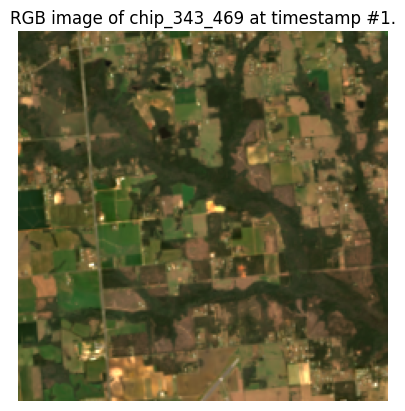

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.025..1.5075].


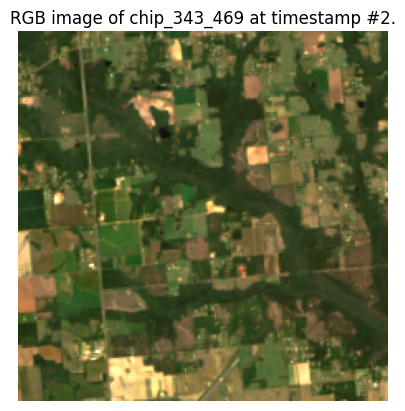

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.152].


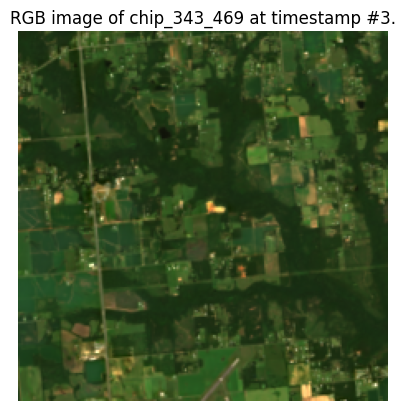

In [ ]:
# tif_path = f"./all_chips/{example_chip}_merged.tif"
tif_path = f"../../Data/ClimateBench-M-IMG/image_chips/{example_chip}_merged.tif"


# plot the RGB image of the chip
with rasterio.open(tif_path) as tif:
    image = tif.read()
    for i in range(3):
        image_ = image[i*6: (i+1)*6]
        # only plot the RGB bands
        rgb_image = np.stack([image_[2,:,:], image_[1,:,:], image_[0,:,:]], axis=2)
        rgb_image = rgb_image / 2000
        plt.imshow(rgb_image)
        plt.title(f"RGB image of {example_chip} at timestamp #{i+1}.")
        plt.axis('off')
        plt.show()

# Plot Example Target Land Cover Map

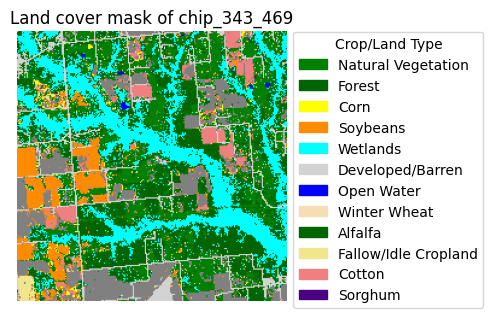

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# define the class labels
class_labels = {
        # 0: "No Data",
        1: "Natural Vegetation",
        2: "Forest",
        3: "Corn",
        4: "Soybeans",
        5: "Wetlands",
        6: "Developed/Barren",
        7: "Open Water",
        8: "Winter Wheat",
        9: "Alfalfa",
        10: "Fallow/Idle Cropland",
        11: "Cotton",
        12: "Sorghum",
        13: "Other"
}

# create a colormap
colors = ['green', 'darkgreen', 'yellow', 'darkorange', 'cyan', 'lightgrey', 'blue', 'wheat', 'darkgreen', 'khaki', 'lightcoral', 'indigo', 'grey']
cmap = ListedColormap(colors)

# plot the mask of the chip
mask_path = f"./ClimateBench-M-IMG/image_chips/{example_chip}.mask.tif"
with rasterio.open(mask_path) as tif:
    image = tif.read()
plt.figure(figsize=(6, 3.5))
plt.imshow(image[0], cmap=cmap)

# create a legend
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=cmap(i)) for i in range(len(class_labels))]
legend_labels = [class_labels[i] for i in range(1, len(class_labels))]
plt.legend(
    legend_handles, legend_labels, 
    loc='upper left',
    bbox_to_anchor=(1, 1.025), 
    title='Crop/Land Type'
)
plt.axis('off')
plt.title(f"Land cover mask of {example_chip}")
plt.show()